# DSCI 510
# Final Project

# Fatia Marwa Nastitie
# USC ID: 3143982880

# Scrape WNBA Stats Data

In [161]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_wnba_stats(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', {'id': 'totals'})
        
        if not table:
            print("Table not found.")
            return None
        
        headers = ['Player', 'Team', 'Pos', 'G', 'MP', 'G_Started', 'GS', 'MP_Started', 
                  'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                  'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


        data_rows = []
        tbody = table.find('tbody')
        for row in tbody.find_all('tr', class_=lambda x: x != 'thead'):
            cells = row.find_all(['td', 'th'])
            if cells:
                row_data = []
                for cell in cells:
                    value = cell.text.strip()
                    if cell.find('a'):
                        value = cell.find('a').text.strip()
                    row_data.append(value)
                if any(row_data):
                    data_rows.append(row_data)
        
        if not data_rows:
            print("No data rows found")
            return None
        
        df = pd.DataFrame(data_rows, columns=headers)
        numeric_cols = df.columns.difference(['Player', 'Team', 'Pos'])
        for col in numeric_cols:
            df[col] = pd.to_numeric(df[col].str.replace('.', '0', regex=False), errors='coerce')
        
            if '%' in col:
                df[col] = df[col] / 1000  # Convert .466 stored as 466 back to 0.466
                
        return df
        
    except requests.exceptions.RequestException as e:
        print(f"Error making request: {e}")
        return None
    except Exception as e:
        print(f"Error parsing data: {e}")
        print(f"Error details: {str(e)}")
        return None


In [162]:
url = 'https://www.basketball-reference.com/wnba/years/2024_totals.html#totals'

In [163]:
df = pd.DataFrame(scrape_wnba_stats(url))
df.to_csv('wnba_stats.csv', index=False)
df.head()

,Player,Team,Pos,G,MP,G_Started,GS,MP_Started,FG,FGA,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Lindsay Allen,CHI,G,40,950,40,28,950,104,223,...,52,0.808,13,80,157,32,7,64,67,264
1,Rebecca Allen,PHO,F-G,18,447,18,18,447,53,126,...,3,0.667,13,71,20,17,12,18,35,133
2,Laeticia Amihere,ATL,F,16,83,16,0,83,7,26,...,17,0.294,12,27,3,2,3,8,7,19
3,Ariel Atkins,WAS,G,40,1196,40,40,1196,217,497,...,99,0.848,36,135,124,59,17,92,112,597
4,Amy Atwell,PHO,F,6,59,6,0,59,4,15,...,5,0.800,3,6,6,0,1,2,3,15


In [5]:
df.describe()

,G,MP,G_Started,GS,MP_Started,FG,FGA,FG%,3P,3PA,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,182.000000,183.000000,183.000000,...,183.000000,171.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,26.464481,558.928962,26.464481,13.590164,558.928962,82.595628,189.267760,0.560522,21.535519,63.715847,...,49.448087,1.171608,22.579235,94.830601,57.519126,20.622951,11.229508,36.994536,47.863388,225.557377
std,12.609415,416.669263,12.609415,14.691753,416.669263,79.955828,175.059046,1.230840,27.236603,75.320532,...,55.330339,1.966418,26.100040,94.069116,60.054173,17.791989,14.419226,33.165502,35.075083,219.912260
min,1.000000,3.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,212.000000,16.000000,0.000000,212.000000,19.500000,53.500000,0.352000,2.000000,7.500000,...,10.000000,0.667000,5.500000,25.500000,12.000000,6.000000,1.500000,12.000000,18.500000,53.000000
50%,29.000000,492.000000,29.000000,9.000000,492.000000,58.000000,141.000000,0.415500,11.000000,37.000000,...,28.000000,0.783000,14.000000,65.000000,43.000000,16.000000,7.000000,29.000000,45.000000,153.000000
75%,38.500000,869.500000,38.500000,26.000000,869.500000,114.000000,252.500000,0.477250,30.000000,83.000000,...,68.500000,0.841500,28.500000,138.500000,79.500000,29.500000,14.500000,54.500000,70.000000,313.000000
max,40.000000,1465.000000,40.000000,40.000000,1465.000000,385.000000,743.000000,10.000000,122.000000,355.000000,...,275.000000,10.000000,172.000000,451.000000,337.000000,81.000000,98.000000,223.000000,130.000000,1021.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      183 non-null    object 
 1   Team        183 non-null    object 
 2   Pos         183 non-null    object 
 3   G           183 non-null    int64  
 4   MP          183 non-null    int64  
 5   G_Started   183 non-null    int64  
 6   GS          183 non-null    int64  
 7   MP_Started  183 non-null    int64  
 8   FG          183 non-null    int64  
 9   FGA         183 non-null    int64  
 10  FG%         182 non-null    float64
 11  3P          183 non-null    int64  
 12  3PA         183 non-null    int64  
 13  3P%         162 non-null    float64
 14  2P          183 non-null    int64  
 15  2PA         183 non-null    int64  
 16  2P%         181 non-null    float64
 17  FT          183 non-null    int64  
 18  FTA         183 non-null    int64  
 19  FT%         171 non-null    f

# Clean WNBA Stat data

In [ ]:
def clean_wnba_stats(dfs):
    dfs = pd.read_csv('wnba_stats.csv')
    duplicate = dfs[dfs.duplicated(subset=['Player'], keep=False)]
    duplicate.sort_values(by='Player', ascending=True)
    cleaned_df = dfs.copy()

    tot_players = dfs[dfs['Team'] == 'TOT']['Player'].unique()

    for player in tot_players:
        player_rows = dfs[dfs['Player'] == player]
        tot_row = player_rows[player_rows['Team'] == 'TOT'].iloc[0]
        latest_team = player_rows[player_rows['Team'] != 'TOT'].iloc[-1]['Team']
        cleaned_df = cleaned_df[cleaned_df['Player'] != player]
        new_row = tot_row.copy()
        new_row['Team'] = latest_team
        cleaned_df = pd.concat([cleaned_df, pd.DataFrame([new_row])], ignore_index=True)

    cleaned_df['player_name'] = (cleaned_df['Player']
    .str.normalize('NFKD')  
    .str.encode('ascii', errors='ignore')  
    .str.decode('utf-8')    
    .str.lower()            
    .str.replace('-', ' ')
    .str.replace("'", '')   
    .str.strip()) 

    cleaned_df['player_name'] = cleaned_df['player_name'].replace('nika ma14hl', 'nika muhl')
    cleaned_df['FG%'] = cleaned_df['FG%'].fillna(0)
    cleaned_df['3P%'] = cleaned_df['3P%'].fillna(0)
    cleaned_df['2P%'] = cleaned_df['2P%'].fillna(0)
    cleaned_df['FT%'] = cleaned_df['FT%'].fillna(0)
    cleaned_df['Pos'] = cleaned_df['Pos'].fillna('G') 

    df_stat = cleaned_df.drop('Player', axis=1)  

    return df_stat

In [119]:
dfs = pd.read_csv('wnba_stats.csv')
dfs.head()

,Player,Team,Pos,G,MP,G_Started,GS,MP_Started,FG,FGA,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Lindsay Allen,CHI,G,40,950,40,28,950,104,223,...,52,0.808,13,80,157,32,7,64,67,264
1,Rebecca Allen,PHO,F-G,18,447,18,18,447,53,126,...,3,0.667,13,71,20,17,12,18,35,133
2,Laeticia Amihere,ATL,F,16,83,16,0,83,7,26,...,17,0.294,12,27,3,2,3,8,7,19
3,Ariel Atkins,WAS,G,40,1196,40,40,1196,217,497,...,99,0.848,36,135,124,59,17,92,112,597
4,Amy Atwell,PHO,F,6,59,6,0,59,4,15,...,5,0.800,3,6,6,0,1,2,3,15


In [120]:
duplicate = dfs[dfs.duplicated(subset=['Player'], keep=False)]
duplicate.sort_values(by='Player', ascending=True)

,Player,Team,Pos,G,MP,G_Started,GS,MP_Started,FG,FGA,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
174,Celeste Taylor,CON,G,2,11,2,0,11,1,1,...,0,NaN,0,0,0,0,0,0,4,2
168,Celeste Taylor,IND,G,5,16,5,0,16,1,1,...,2,0.500,0,1,1,0,1,1,1,3
156,Celeste Taylor,TOT,G,22,328,22,4,328,21,62,...,18,0.556,6,28,28,15,10,22,22,58
175,Celeste Taylor,PHO,G,15,301,15,4,301,19,60,...,16,0.563,6,27,27,15,9,21,17,53
160,Crystal Dangerfield,ATL,G,15,211,15,0,211,15,54,...,11,10.000,1,16,26,4,3,9,13,46
148,Crystal Dangerfield,TOT,G,33,441,33,5,441,37,131,...,17,0.882,2,34,62,11,6,26,25,106
176,Crystal Dangerfield,LAS,G,18,230,18,5,230,22,77,...,6,0.667,1,18,36,7,3,17,12,60
165,Marina Mabrey,CHI,G,24,796,24,24,796,123,323,...,47,0.723,17,118,109,29,7,67,64,336
181,Marina Mabrey,CON,G,16,439,16,3,439,91,195,...,22,0.682,5,56,54,16,10,27,40,239
153,Marina Mabrey,TOT,G,40,1235,40,27,1235,214,518,...,69,0.710,22,174,163,45,17,94,104,575


In [121]:
cleaned_df = dfs.copy()

# Get players who have TOT in their records
tot_players = dfs[dfs['Team'] == 'TOT']['Player'].unique()

for player in tot_players:
    # Get all rows for this player
    player_rows = dfs[dfs['Player'] == player]
    
    # Get the TOT row
    tot_row = player_rows[player_rows['Team'] == 'TOT'].iloc[0]
    
    # Get the latest team (non-TOT team with highest index)
    latest_team = player_rows[player_rows['Team'] != 'TOT'].iloc[-1]['Team']
    
    # Remove all rows for this player
    cleaned_df = cleaned_df[cleaned_df['Player'] != player]
    
    # Create new row with TOT stats but latest team
    new_row = tot_row.copy()
    new_row['Team'] = latest_team
    
    # Add the new row
    cleaned_df = pd.concat([cleaned_df, pd.DataFrame([new_row])], ignore_index=True)


In [ ]:
display(cleaned_df)

,Player,Team,Pos,G,MP,G_Started,GS,MP_Started,FG,FGA,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Lindsay Allen,CHI,G,40,950,40,28,950,104,223,...,52,0.808,13,80,157,32,7,64,67,264
1,Rebecca Allen,PHO,F-G,18,447,18,18,447,53,126,...,3,0.667,13,71,20,17,12,18,35,133
2,Laeticia Amihere,ATL,F,16,83,16,0,83,7,26,...,17,0.294,12,27,3,2,3,8,7,19
3,Ariel Atkins,WAS,G,40,1196,40,40,1196,217,497,...,99,0.848,36,135,124,59,17,92,112,597
4,Amy Atwell,PHO,F,6,59,6,0,59,4,15,...,5,0.800,3,6,6,0,1,2,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Sika KonÃ©,WAS,F,27,217,27,0,217,36,84,...,36,0.861,14,55,12,6,2,14,25,107
153,Marina Mabrey,CON,G,40,1235,40,27,1235,214,518,...,69,0.710,22,174,163,45,17,94,104,575
154,Odyssey Sims,LAS,G,24,700,24,17,700,117,242,...,63,0.762,17,51,127,28,5,52,36,302
155,Sug Sutton,WAS,G,29,379,29,0,379,24,79,...,13,0.692,6,28,62,16,1,34,26,67


In [123]:
cleaned_df['player_name'] = (cleaned_df['Player']
    .str.normalize('NFKD')  # Normalize unicode characters
    .str.encode('ascii', errors='ignore')  # Remove non-ASCII characters
    .str.decode('utf-8')    # Convert back to string
    .str.lower()            # Convert to lowercase
    .str.replace('-', ' ')
    .str.replace("'", '')   # Remove single quotes
    .str.strip()            # Remove leading/trailing whitespace
)

print(cleaned_df[['Player', 'player_name']].tail(10))

                  Player          player_name
147     Monique Billings     monique billings
148  Crystal Dangerfield  crystal dangerfield
149           Queen Egbo           queen egbo
150   Myisha Hines-Allen   myisha hines allen
151     Moriah Jefferson     moriah jefferson
152           Sika KonÃ©            sika kona
153        Marina Mabrey        marina mabrey
154         Odyssey Sims         odyssey sims
155           Sug Sutton           sug sutton
156       Celeste Taylor       celeste taylor


In [124]:
cleaned_df['player_name'] = cleaned_df['player_name'].replace('nika ma14hl', 'nika muhl')

In [125]:
cleaned_df.isnull().sum()

Player          0
Team            0
Pos             1
G               0
MP              0
G_Started       0
GS              0
MP_Started      0
FG              0
FGA             0
FG%             1
3P              0
3PA             0
3P%            15
2P              0
2PA             0
2P%             2
FT              0
FTA             0
FT%             8
ORB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
player_name     0
dtype: int64

In [126]:
cleaned_df['FG%'] = cleaned_df['FG%'].fillna(0)
cleaned_df['3P%'] = cleaned_df['3P%'].fillna(0)
cleaned_df['2P%'] = cleaned_df['2P%'].fillna(0)
cleaned_df['FT%'] = cleaned_df['FT%'].fillna(0)
cleaned_df['Pos'] = cleaned_df['Pos'].fillna('G')

In [127]:
cleaned_df.isnull().sum()

Player         0
Team           0
Pos            0
G              0
MP             0
G_Started      0
GS             0
MP_Started     0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
2P             0
2PA            0
2P%            0
FT             0
FTA            0
FT%            0
ORB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
player_name    0
dtype: int64

In [128]:
df_stat = cleaned_df.drop('Player', axis=1)
df_stat.head()

,Team,Pos,G,MP,G_Started,GS,MP_Started,FG,FGA,FG%,...,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,player_name
0,CHI,G,40,950,40,28,950,104,223,0.466,...,0.808,13,80,157,32,7,64,67,264,lindsay allen
1,PHO,F-G,18,447,18,18,447,53,126,0.421,...,0.667,13,71,20,17,12,18,35,133,rebecca allen
2,ATL,F,16,83,16,0,83,7,26,0.269,...,0.294,12,27,3,2,3,8,7,19,laeticia amihere
3,WAS,G,40,1196,40,40,1196,217,497,0.437,...,0.848,36,135,124,59,17,92,112,597,ariel atkins
4,PHO,F,6,59,6,0,59,4,15,0.267,...,0.800,3,6,6,0,1,2,3,15,amy atwell


In [129]:
df_stat.sort_values(by='player_name', ascending=True)

,Team,Pos,G,MP,G_Started,GS,MP_Started,FG,FGA,FG%,...,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,player_name
47,WAS,F,34,741,34,17,741,103,210,0.490,...,0.650,48,191,48,25,27,50,91,258,aaliyah edwards
88,LAS,G,26,568,26,10,568,77,191,0.403,...,0.843,12,52,96,23,6,48,52,226,aari mcdonald
104,ATL,G,17,304,17,2,304,49,138,0.355,...,0.791,15,56,24,16,4,18,35,146,aerial powers
141,LVA,C,38,1308,38,38,1308,385,743,0.518,...,0.844,79,451,88,68,98,48,67,1021,aja wilson
116,MIN,F,39,1035,39,39,1035,147,312,0.471,...,0.750,61,219,124,53,57,76,119,395,alanna smith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,CON,G,39,1125,39,38,1125,145,341,0.425,...,0.766,10,69,118,40,13,54,66,409,tyasha harris
18,CON,G,31,393,31,1,393,26,72,0.361,...,0.838,13,44,58,14,7,15,32,96,veronica burton
112,IND,F,9,23,9,0,23,3,9,0.333,...,0.500,0,3,0,0,0,1,4,8,victaria saxton
132,SEA,G-F,35,445,35,15,445,41,123,0.333,...,0.667,19,69,29,13,7,20,42,110,victoria vivians


# Scrape Data WNBA Valuation

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

def scrape_wnba_contracts():
    # Set up Chrome options
    chrome_options = Options()
    chrome_options.add_argument('--headless')  # Run in headless mode
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')

    # Initialize the driver
    driver = webdriver.Chrome(options=chrome_options)
    
    try:
        # Load the page
        url = "https://www.spotrac.com/wnba/contracts/"
        driver.get(url)
        
        # Wait for table to load
        wait = WebDriverWait(driver, 10)
        table = wait.until(EC.presence_of_element_located((By.TAG_NAME, "table")))
        
        # Get all rows
        rows = table.find_elements(By.TAG_NAME, "tr")
        
        contracts = []
        # Skip header row
        for row in rows[1:]:
            cols = row.find_elements(By.TAG_NAME, "td")
            if len(cols) >= 10:
                contract = {
                    'player': cols[1].text.strip(),
                    'position': cols[2].text.strip(),
                    'team': cols[3].text.strip(),
                    'age': cols[4].text.strip(),
                    'start': cols[5].text.strip(),
                    'end': cols[6].text.strip(),
                    'years': cols[7].text.strip(),
                    'value': cols[8].text.strip(),
                    'aav': cols[9].text.strip()
                }
                contracts.append(contract)
                
        df = pd.DataFrame(contracts)
        
        # Clean monetary values
        for col in ['value', 'aav']:
            df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)
        
        return df
        
    finally:
        driver.quit()

# Run scraper
df = scrape_wnba_contracts()

if not df.empty:
    df.to_csv('wnba_contracts.csv', index=False)
    print("\nFirst 5 contracts:")
    print(df.head())
    print(f"\nTotal contracts scraped: {len(df)}")
else:
    print("No data was scraped")


First 5 contracts:
             player position team age start   end years     value       aav
0    Natasha Howard        F  DAL  29  2021  2024     4  898700.0  224675.0
1     Alyssa Thomas        F  CON  28  2021  2024     4  836000.0  209000.0
2  Arike Ogunbowale        G  DAL  25  2023  2025     3  725952.0  241984.0
3     Marina Mabrey        G  CON  26  2023  2025     3  620000.0  206667.0
4   Kelsey Mitchell        G  IND  26  2022  2024     3  618000.0  206000.0

Total contracts scraped: 100


In [ ]:
def clean_wnba_val(dfc):
    dfc = pd.read_csv('wnba_contracts.csv')
    dfc= dfc.sort_values(by="end", ascending=False)
    dfc = dfc.groupby('player', as_index=False).agg({
    "position": "first",  # Keep the first position (or adjust based on your preference)
    "team": "first",      # Keep the first team
    "age": "max",        # Average age (if needed)
    "start": "min",       # Earliest start year
    "end": "max",         # Latest end year
    "value": "mean",      # Average salary value
    "aav": "mean"      })

    dfc['player_name'] = (dfc['player']
    .str.normalize('NFKD')  # Normalize unicode characters
    .str.encode('ascii', errors='ignore')  # Remove non-ASCII characters
    .str.decode('utf-8')    # Convert back to string
    .str.lower()            # Convert to lowercase
    .str.replace('-', ' ')
    .str.replace("'", '')   # Remove single quotes
    .str.strip())

    dfc['player_name'] = dfc['player_name'].replace('betnijah laney', 'betnijah laney hamilton')
    dfc['player_name'] = dfc['player_name'].replace('lou lopez senechal', 'lou lopez sanachal')
    df_val = dfc.drop('player', axis=1)

    return df_val
    
    # duplicates = dfc[dfc.duplicated(subset=['player'], keep=False)]
    

In [130]:
dfc = pd.read_csv('wnba_contracts.csv')
dfc.head()

,player,position,team,age,start,end,years,value,aav
0,Natasha Howard,F,DAL,29,2021,2024,4,898700.0,224675.0
1,Alyssa Thomas,F,CON,28,2021,2024,4,836000.0,209000.0
2,Arike Ogunbowale,G,DAL,25,2023,2025,3,725952.0,241984.0
3,Marina Mabrey,G,CON,26,2023,2025,3,620000.0,206667.0
4,Kelsey Mitchell,G,IND,26,2022,2024,3,618000.0,206000.0


# Clean Data WNBA Valuation

In [131]:
duplicates = dfc[dfc.duplicated(subset=['player'], keep=False)]
duplicates

,player,position,team,age,start,end,years,value,aav
2,Arike Ogunbowale,G,DAL,25,2023,2025,3,725952.0,241984.0
4,Kelsey Mitchell,G,IND,26,2022,2024,3,618000.0,206000.0
5,Kayla McBride,G,MIN,28,2021,2023,3,588801.0,196267.0
6,Betnijah Laney,G,NY,27,2021,2023,3,588801.0,196267.0
14,Jewell Loyd,G,SEA,29,2024,2025,2,491016.0,245508.0
18,Jewell Loyd,G,SEA,28,2022,2023,2,463030.0,231515.0
21,Kelsey Plum,G,LV,25,2020,2022,3,423250.0,141083.0
23,Kayla McBride,G,MIN,31,2024,2025,2,413000.0,206500.0
25,Kelsey Plum,G,LV,27,2022,2024,2,400000.0,200000.0
26,A'ja Wilson,C,LV,26,2024,2025,2,400000.0,200000.0


In [132]:
dfc= dfc.sort_values(by="end", ascending=False)
# display(dfcs)

In [133]:
dfc = dfc.groupby('player', as_index=False).agg({
    "position": "first",  # Keep the first position (or adjust based on your preference)
    "team": "first",      # Keep the first team
    "age": "max",        # Average age (if needed)
    "start": "min",       # Earliest start year
    "end": "max",         # Latest end year
    "value": "mean",      # Average salary value
    "aav": "mean"         # Average annual value (if applicable)
})

In [134]:
display(dfc)

,player,position,team,age,start,end,value,aav
0,A'ja Wilson,C,LV,26,2022,2025,399211.0,199605.5
1,Aaliyah Edwards,F,WAS,21,2024,2027,324383.0,81096.0
2,Aari McDonald,G,LA,22,2021,2024,220067.0,73356.0
3,Alanna Smith,F,MIN,27,2024,2025,300000.0,150000.0
4,Alissa Pili,F,MIN,22,2024,2027,324383.0,81096.0
...,...,...,...,...,...,...,...,...
87,Stephanie Soares,C,DAL,23,2024,2027,338056.0,84514.0
88,Stephanie Talbot,F,GS,28,2023,2024,227000.0,113500.0
89,Teaira McCowan,C,DAL,26,2023,2025,587100.0,195700.0
90,Tiffany Mitchell,G,CON,28,2023,2024,274050.0,137025.0


In [135]:
dfc.sort_values(by='player', ascending=True)

,player,position,team,age,start,end,value,aav
0,A'ja Wilson,C,LV,26,2022,2025,399211.0,199605.5
1,Aaliyah Edwards,F,WAS,21,2024,2027,324383.0,81096.0
2,Aari McDonald,G,LA,22,2021,2024,220067.0,73356.0
3,Alanna Smith,F,MIN,27,2024,2025,300000.0,150000.0
4,Alissa Pili,F,MIN,22,2024,2027,324383.0,81096.0
...,...,...,...,...,...,...,...,...
87,Stephanie Soares,C,DAL,23,2024,2027,338056.0,84514.0
88,Stephanie Talbot,F,GS,28,2023,2024,227000.0,113500.0
89,Teaira McCowan,C,DAL,26,2023,2025,587100.0,195700.0
90,Tiffany Mitchell,G,CON,28,2023,2024,274050.0,137025.0


In [136]:
dfc['player_name'] = (dfc['player']
    .str.normalize('NFKD')  # Normalize unicode characters
    .str.encode('ascii', errors='ignore')  # Remove non-ASCII characters
    .str.decode('utf-8')    # Convert back to string
    .str.lower()            # Convert to lowercase
    .str.replace('-', ' ')
    .str.replace("'", '')   # Remove single quotes
    .str.strip()            # Remove leading/trailing whitespace
)

print(dfc[['player', 'player_name']].tail(10))

                  player           player_name
82         Sami Whitcomb         sami whitcomb
83        Shakira Austin        shakira austin
84  Skylar Diggins-Smith  skylar diggins smith
85     Sophie Cunningham     sophie cunningham
86       Stefanie Dolson       stefanie dolson
87      Stephanie Soares      stephanie soares
88      Stephanie Talbot      stephanie talbot
89        Teaira McCowan        teaira mccowan
90      Tiffany Mitchell      tiffany mitchell
91             Zia Cooke             zia cooke


In [137]:
dfc['player_name'] = dfc['player_name'].replace('betnijah laney', 'betnijah laney hamilton')
dfc['player_name'] = dfc['player_name'].replace('lou lopez senechal', 'lou lopez sanachal')

In [138]:
dfc.isnull().sum()

player         0
position       0
team           0
age            0
start          0
end            0
value          0
aav            0
player_name    0
dtype: int64

In [139]:
df_val = dfc.drop('player', axis=1)
df_val.head()

,position,team,age,start,end,value,aav,player_name
0,C,LV,26,2022,2025,399211.0,199605.5,aja wilson
1,F,WAS,21,2024,2027,324383.0,81096.0,aaliyah edwards
2,G,LA,22,2021,2024,220067.0,73356.0,aari mcdonald
3,F,MIN,27,2024,2025,300000.0,150000.0,alanna smith
4,F,MIN,22,2024,2027,324383.0,81096.0,alissa pili


# Merge

In [ ]:
# First, drop the position and team columns from df_val
df_val_clean = df_val.drop(['position', 'team'], axis=1)

# Merge the DataFrames using player_name as the key with outer join
merged_df = pd.merge(
    df_stat, 
    df_val_clean,
    on='player_name',
    how='outer'
)



In [141]:
# To see which records exist in df_val but not in df_stat
missing_in_stat = merged_df[merged_df['Team'].isna()]
print("Records in df_val but not in df_stat:")
print(missing_in_stat[['player_name', 'age', 'value', 'aav']])

Records in df_val but not in df_stat:
        player_name   age     value       aav
15       awak kuier  19.0  220067.0   73356.0
66  jessica shepard  26.0  243600.0  121800.0


In [142]:
# To see which records exist in df_stat but not in df_val
missing_in_val = merged_df[merged_df['age'].isna()]
print("\nRecords in df_stat but not in df_val:")
print(missing_in_val[['player_name', 'Team', 'Pos', 'PTS']])


Records in df_stat but not in df_val:
          player_name Team  Pos    PTS
2       aerial powers  ATL    G  146.0
10         amy atwell  PHO    F   15.0
14   astou ndour fall  CON  C-F   25.0
22    brittney griner  PHO    C  534.0
24     caitlin bickle  CON    F    0.0
..                ...  ...  ...    ...
153      tina charles  ATL    C  581.0
154     tyasha harris  CON    G  409.0
155   veronica burton  CON    G   96.0
156   victaria saxton  IND    F    8.0
157  victoria vivians  SEA  G-F  110.0

[67 rows x 4 columns]


In [143]:
player_list = missing_in_val['player_name'].tolist()
for player in player_list:
    print(player)

aerial powers
amy atwell
astou ndour fall
brittney griner
caitlin bickle
cecilia zandalasini
celeste taylor
charisma osborne
chennedy carter
crystal dangerfield
damiris dantas
dana evans
destanni henderson
diamond deshields
didi richards
dijonai carrington
dulcy fankam mendjiadeu
dyaisha fair
elizabeth williams
emily engstler
emma cannon
ezinne kalu
gabby williams
ivana dojkia
jaelyn brown
jakia brown turner
jaylyn sherrod
jessika carter
joyner holmes
julie vanloo
kaela davis
kennedy burke
kiana williams
kristy wallace
kysre gondrezick
lexie brown
li yueru
lindsay allen
liz dixon
lorela cubaj
maya caldwell
megan gustafson
mikiah herbert harrigan
monique billings
morgan bertsch
natasha mack
naz hillmon
nyara sabally
odyssey sims
olivia apoupa
olivia nelson ododa
queen egbo
rachel banham
satou sabally
sevgi uzun
shatori walker kimbrough
sika kona
sug sutton
sydney colson
taylor soule
temi fagbenle
tiffany hayes
tina charles
tyasha harris
veronica burton
victaria saxton
victoria vivians


In [144]:
# Show total counts of mismatches
print(f"\nTotal records only in df_val: {len(missing_in_stat)}")
print(f"Total records only in df_stat: {len(missing_in_val)}")


Total records only in df_val: 2
Total records only in df_stat: 67


In [145]:
display(merged_df)

,Team,Pos,G,MP,G_Started,GS,MP_Started,FG,FGA,FG%,...,BLK,TOV,PF,PTS,player_name,age,start,end,value,aav
0,WAS,F,34.0,741.0,34.0,17.0,741.0,103.0,210.0,0.490,...,27.0,50.0,91.0,258.0,aaliyah edwards,21.0,2024.0,2027.0,324383.0,81096.0
1,LAS,G,26.0,568.0,26.0,10.0,568.0,77.0,191.0,0.403,...,6.0,48.0,52.0,226.0,aari mcdonald,22.0,2021.0,2024.0,220067.0,73356.0
2,ATL,G,17.0,304.0,17.0,2.0,304.0,49.0,138.0,0.355,...,4.0,18.0,35.0,146.0,aerial powers,NaN,NaN,NaN,NaN,NaN
3,LVA,C,38.0,1308.0,38.0,38.0,1308.0,385.0,743.0,0.518,...,98.0,48.0,67.0,1021.0,aja wilson,26.0,2022.0,2025.0,399211.0,199605.5
4,MIN,F,39.0,1035.0,39.0,39.0,1035.0,147.0,312.0,0.471,...,57.0,76.0,119.0,395.0,alanna smith,27.0,2024.0,2025.0,300000.0,150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,CON,G,39.0,1125.0,39.0,38.0,1125.0,145.0,341.0,0.425,...,13.0,54.0,66.0,409.0,tyasha harris,NaN,NaN,NaN,NaN,NaN
155,CON,G,31.0,393.0,31.0,1.0,393.0,26.0,72.0,0.361,...,7.0,15.0,32.0,96.0,veronica burton,NaN,NaN,NaN,NaN,NaN
156,IND,F,9.0,23.0,9.0,0.0,23.0,3.0,9.0,0.333,...,0.0,1.0,4.0,8.0,victaria saxton,NaN,NaN,NaN,NaN,NaN
157,SEA,G-F,35.0,445.0,35.0,15.0,445.0,41.0,123.0,0.333,...,7.0,20.0,42.0,110.0,victoria vivians,NaN,NaN,NaN,NaN,NaN


- Highest scoring players
- Relationship Between Games Started and Assists
- Correlation Matrix betweet stats metrics
- Team-Level Analysis - Average PPG by Team
- Box Plot of Player Points Per Game (PPG) by Position
- Player Efficiency Rating (PER)


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Highest scoring players

In [148]:
# Top 10 scorers
top_scorers = merged_df.nlargest(10, 'PTS')[['player_name', 'Team', 'PTS', 'G']]
# Calculate Points Per Game
top_scorers['PPG'] = top_scorers['PTS'] / top_scorers['G']
print("Top 10 Scorers:\n", top_scorers)

Top 10 Scorers:
           player_name Team     PTS     G        PPG
3          aja wilson  LVA  1021.0  38.0  26.868421
13   arike ogunbowale  DAL   845.0  38.0  22.236842
75     kahleah copper  PHO   782.0  37.0  21.135135
18    breanna stewart  NYL   777.0  38.0  20.447368
25      caitlin clark  IND   769.0  40.0  19.225000
83    kelsey mitchell  IND   767.0  40.0  19.175000
68        jewell loyd  SEA   729.0  37.0  19.702703
115  napheesa collier  MIN   694.0  34.0  20.411765
38      dearica hamby  LAS   691.0  40.0  17.275000
134   sabrina ionescu  NYL   691.0  38.0  18.184211


# Game Started vs Assists 

Text(0, 0.5, 'Total Assists')

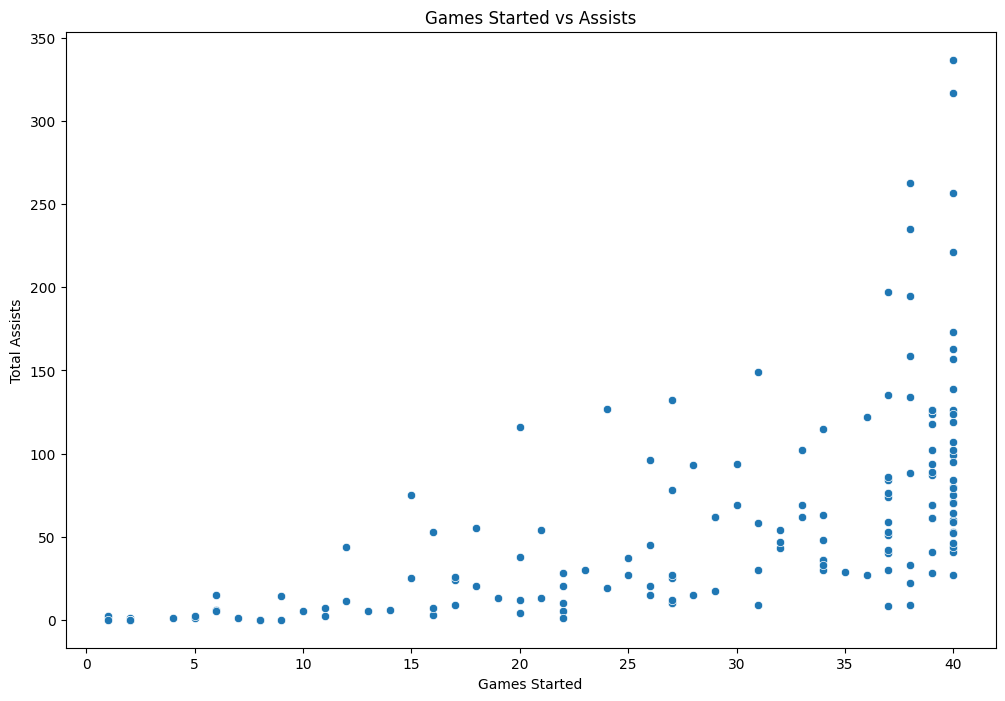

In [149]:
# Scatter plot of Games Started vs Assists
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='G_Started', y='AST')
plt.title('Games Started vs Assists')
plt.xlabel('Games Started')
plt.ylabel('Total Assists')

In [ ]:
def analyze_data(df_stat,df_val_clean):
    merged_df = pd.merge(
    df_stat, 
    df_val_clean,
    on='player_name',
    how='outer')
    
    missing_in_stat = merged_df[merged_df['Team'].isna()]
    missing_in_val = merged_df[merged_df['age'].isna()]
    print(f"\nTotal records only in df_val: {len(missing_in_stat)}")
    print(f"Total records only in df_stat: {len(missing_in_val)}")

    # Top 10 scorers
    top_scorers = merged_df.nlargest(10, 'PTS')[['player_name', 'Team', 'PTS', 'G']]
    # Calculate Points Per Game
    top_scorers['PPG'] = top_scorers['PTS'] / top_scorers['G']
    print("Top 10 Scorers:\n", top_scorers)

    # Scatter plot of Games Started vs Assists
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=merged_df, x='G_Started', y='AST')
    plt.title('Games Started vs Assists')
    plt.xlabel('Games Started')
    plt.ylabel('Total Assists')

    # Correlation Matrix Stats
    numeric_cols = ['G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 
                'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

    corr_matrix = merged_df[numeric_cols].corr()
    plt.figure(figsize=(15, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Player Statistics')

    # Team Level Analysis
    team_ppg = merged_df.groupby('Team').agg({
    'PTS': ['mean', 'std', 'count']}).round(2)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=merged_df, x='Team', y='PTS')
    plt.xticks(rotation=45)
    plt.title('Average Points by Team')

    # Boxplot by Position
    merged_df['PPG'] = merged_df['PTS'] / merged_df['G']
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_df, x='Pos', y='PPG')
    plt.title('Points Per Game Distribution by Position')
    plt.xlabel('Position')
    plt.ylabel('Points Per Game')

    # Player Efficiency Rating
    merged_df['PER'] = (
    (merged_df['PTS'] + merged_df['TRB'] + merged_df['AST'] + 
     merged_df['STL'] + merged_df['BLK'] - merged_df['TOV'] - 
     (merged_df['FGA'] - merged_df['FG']) - 
     (merged_df['FTA'] - merged_df['FT'])) / merged_df['G'])

    def analyze_performance_value(df):
        # Calculate performance metrics
        df['points_per_dollar'] = df['PTS'] / df['value']
        df['minutes_per_dollar'] = df['MP'] / df['value']
        
        # Calculate efficiency rating (simplified version)
        df['efficiency'] = (df['PTS'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK'] - 
                        (df['FGA'] - df['FG']) - (df['FTA'] - df['FT']) - df['TOV']) / df['G']
        df['efficiency_per_dollar'] = df['efficiency'] / df['value']
        
        plt.figure(figsize=(15, 10))
        
        # Subplot 1: Points per dollar
        plt.subplot(2, 2, 1)
        sns.scatterplot(data=df, x='value', y='PTS', hue='Pos')
        plt.title('Salary vs Points')
        
        # Subplot 2: Efficiency rating vs salary
        plt.subplot(2, 2, 2)
        sns.scatterplot(data=df, x='value', y='efficiency')
        plt.title('Salary vs Efficiency Rating')
        
        # Top 10 value players
        value_players = df.nlargest(10, 'points_per_dollar')[
            ['player_name', 'Team', 'PTS', 'value', 'points_per_dollar']
        ]
        print("\nTop 10 Players by Points per Dollar:")
        print(value_players)
        
        plt.tight_layout()
        plt.show()

    analyze_performance_value(merged_df)

    def analyze_per_salary_eda(df):
        # 1. Calculate PER per million dollars
        df['per_salary_ratio'] = df['PER'] / (df['value'] / 1000000)
        
        print("\nTop 10 Value Players (PER per Million $):")
        top_value = df.nlargest(10, 'per_salary_ratio')[
            ['player_name', 'Team', 'Pos', 'PER', 'value', 'per_salary_ratio']
        ].round(2)
        print(top_value)
        
        print("\nBottom 10 Value Players (PER per Million $):")
        bottom_value = df.nsmallest(10, 'per_salary_ratio')[
            ['player_name', 'Team', 'Pos', 'PER', 'value', 'per_salary_ratio']
        ].round(2)
        print(bottom_value)
        
    analyze_per_salary_eda(merged_df)
    
    

    

In [ ]:
# Calculate correlation
merged_df['G_Started'].corr(merged_df['AST'])

np.float64(0.5661360458543829)

# Correlation Matrix Stats

Text(0.5, 1.0, 'Correlation Matrix of Player Statistics')

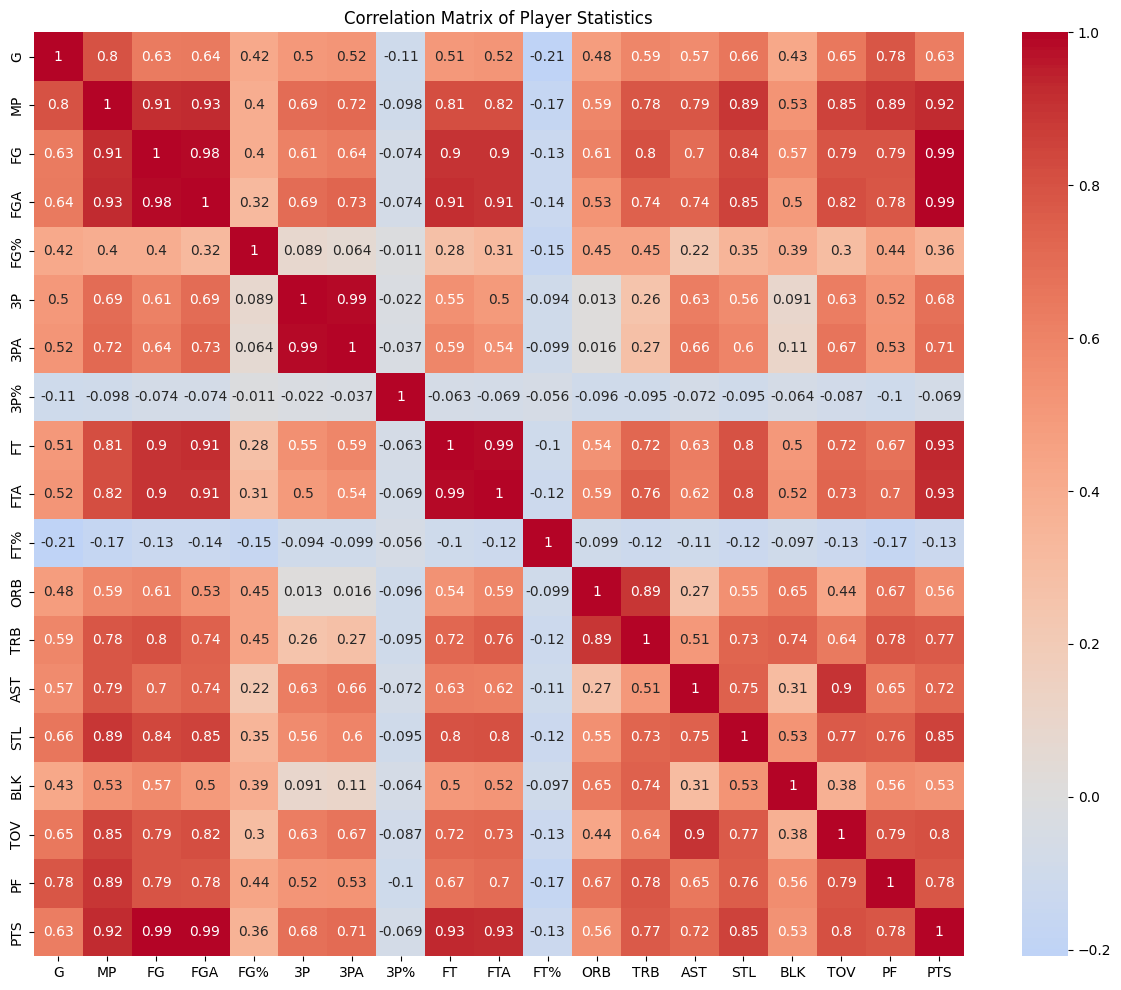

In [ ]:
numeric_cols = ['G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 
                'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

corr_matrix = merged_df[numeric_cols].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Player Statistics')

# Team Level Analysis

Text(0.5, 1.0, 'Average Points by Team')

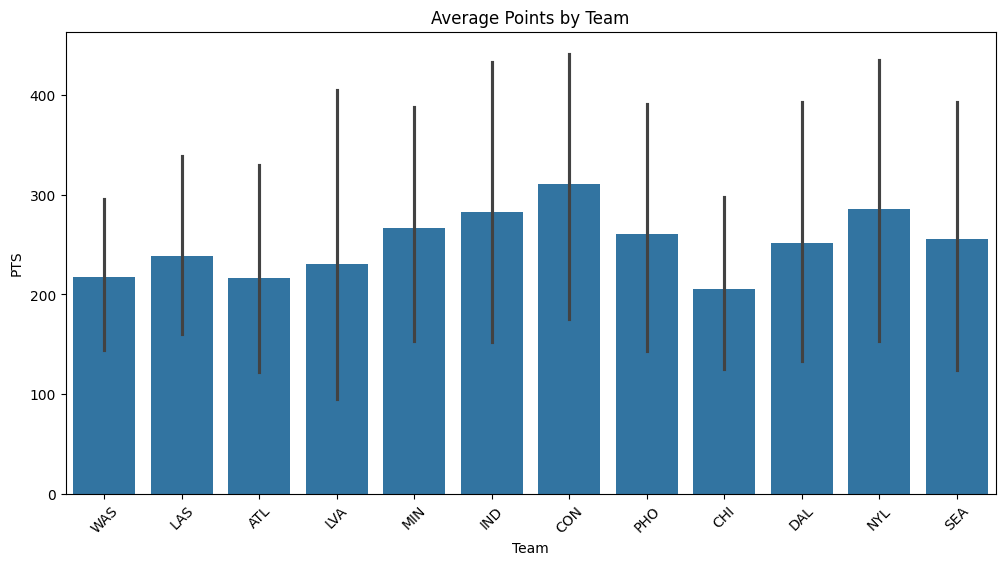

In [ ]:
team_ppg = merged_df.groupby('Team').agg({
    'PTS': ['mean', 'std', 'count']}).round(2)

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='Team', y='PTS')
plt.xticks(rotation=45)
plt.title('Average Points by Team')

# Boxplot by Position

Text(0, 0.5, 'Points Per Game')

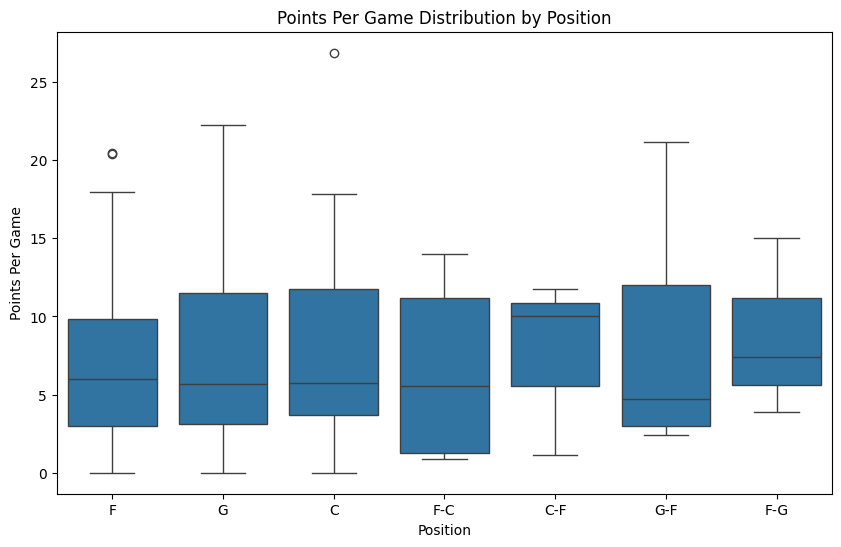

In [ ]:
merged_df['PPG'] = merged_df['PTS'] / merged_df['G']
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Pos', y='PPG')
plt.title('Points Per Game Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Points Per Game')

# Player Efficiency Rating

Top 10 Players by PER:
           player_name Team        PER
3          aja wilson  LVA  33.605263
115  napheesa collier  MIN  25.705882
18    breanna stewart  NYL  24.500000
69      jonquel jones  NYL  20.974359
25      caitlin clark  IND  20.875000
123    nneka ogwumike  SEA  20.864865
22    brittney griner  PHO  20.833333
38      dearica hamby  LAS  20.700000
6       aliyah boston  IND  20.175000
9       alyssa thomas  CON  19.950000


Text(0.5, 1.0, 'Player Efficiency Rating Distribution')

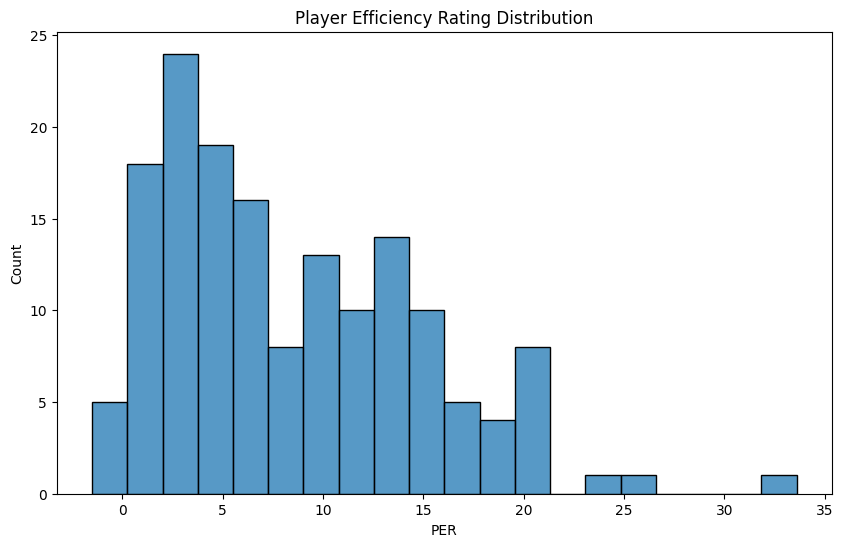

In [ ]:
merged_df['PER'] = (
    (merged_df['PTS'] + merged_df['TRB'] + merged_df['AST'] + 
     merged_df['STL'] + merged_df['BLK'] - merged_df['TOV'] - 
     (merged_df['FGA'] - merged_df['FG']) - 
     (merged_df['FTA'] - merged_df['FT'])) / merged_df['G']
)

top_per = merged_df.nlargest(10, 'PER')[['player_name', 'Team', 'PER']]
print("Top 10 Players by PER:\n", top_per)

plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='PER', bins=20)
plt.title('Player Efficiency Rating Distribution')

# Performance Based Value Analysis

In [155]:
# Calculate and analyze performance metrics relative to salary
def analyze_performance_value(df):
    # Calculate performance metrics
    df['points_per_dollar'] = df['PTS'] / df['value']
    df['minutes_per_dollar'] = df['MP'] / df['value']
    
    # Calculate efficiency rating (simplified version)
    df['efficiency'] = (df['PTS'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK'] - 
                       (df['FGA'] - df['FG']) - (df['FTA'] - df['FT']) - df['TOV']) / df['G']
    df['efficiency_per_dollar'] = df['efficiency'] / df['value']
    
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Points per dollar
    plt.subplot(2, 2, 1)
    sns.scatterplot(data=df, x='value', y='PTS', hue='Pos')
    plt.title('Salary vs Points')
    
    # Subplot 2: Efficiency rating vs salary
    plt.subplot(2, 2, 2)
    sns.scatterplot(data=df, x='value', y='efficiency')
    plt.title('Salary vs Efficiency Rating')
    
    # Top 10 value players
    value_players = df.nlargest(10, 'points_per_dollar')[
        ['player_name', 'Team', 'PTS', 'value', 'points_per_dollar']
    ]
    print("\nTop 10 Players by Points per Dollar:")
    print(value_players)
    
    plt.tight_layout()
    plt.show()


Top 10 Players by Points per Dollar:
         player_name Team     PTS     value  points_per_dollar
18   breanna stewart  NYL   777.0  205000.0           0.003790
38     dearica hamby  LAS   691.0  202000.0           0.003421
123   nneka ogwumike  SEA   619.0  204500.0           0.003027
40    dewanna bonner  CON   601.0  200000.0           0.003005
21     brionna jones  CON   549.0  212000.0           0.002590
3         aja wilson  LVA  1021.0  399211.0           0.002558
6      aliyah boston  IND   560.0  233468.0           0.002399
132     rhyne howard  ATL   519.0  226668.0           0.002290
25     caitlin clark  IND   769.0  338056.0           0.002275
114    nalyssa smith  IND   422.0  226668.0           0.001862


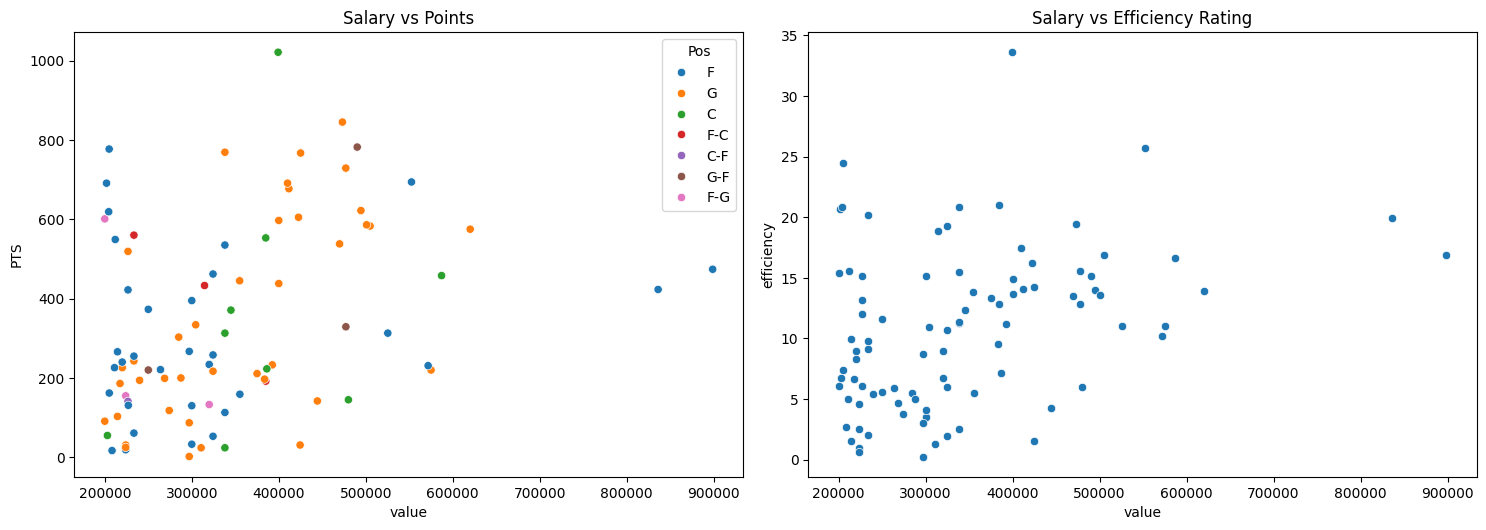

In [156]:
analyze_performance_value(merged_df)

# PER vs salary 

In [ ]:
def analyze_per_salary_eda(df):
    # 1. Calculate PER per million dollars
    df['per_salary_ratio'] = df['PER'] / (df['value'] / 1000000)
      
    print("\nTop 10 Value Players (PER per Million $):")
    top_value = df.nlargest(10, 'per_salary_ratio')[
        ['player_name', 'Team', 'Pos', 'PER', 'value', 'per_salary_ratio']
    ].round(2)
    print(top_value)
    
    print("\nBottom 10 Value Players (PER per Million $):")
    bottom_value = df.nsmallest(10, 'per_salary_ratio')[
        ['player_name', 'Team', 'Pos', 'PER', 'value', 'per_salary_ratio']
    ].round(2)
    print(bottom_value)
    
analyze_per_salary_eda(merged_df)


Top 10 Value Players (PER per Million $):
         player_name Team  Pos    PER     value  per_salary_ratio
18   breanna stewart  NYL    F  24.50  205000.0            119.51
38     dearica hamby  LAS    F  20.70  202000.0            102.48
123   nneka ogwumike  SEA    F  20.86  204500.0            102.03
6      aliyah boston  IND  F-C  20.18  233468.0             86.41
3         aja wilson  LVA    C  33.61  399211.0             84.18
40    dewanna bonner  CON  F-G  15.35  200000.0             76.75
21     brionna jones  CON    F  15.52  212000.0             73.23
132     rhyne howard  ATL    G  15.13  226668.0             66.76
25     caitlin clark  IND    G  20.88  338056.0             61.75
53      ezi magbegor  SEA  F-C  18.84  314650.0             59.87

Bottom 10 Value Players (PER per Million $):
            player_name Team Pos   PER     value  per_salary_ratio
122           nika muhl  SEA   G  0.25  297045.0              0.84
101  lou lopez sanachal  DAL   G  0.63  224026.0   

# Reference 

In [ ]:
# This file contains functions and methods that are used to get the raw data
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_wnba_stats(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    try:
        url = 'https://www.basketball-reference.com/wnba/years/2024_totals.html#totals'
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', {'id': 'totals'})
        
        if not table:
            print("Table not found.")
            return None
        
        headers = ['Player', 'Team', 'Pos', 'G', 'MP', 'G_Started', 'GS', 'MP_Started', 
                  'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                  'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


        data_rows = []
        tbody = table.find('tbody')
        for row in tbody.find_all('tr', class_=lambda x: x != 'thead'):
            cells = row.find_all(['td', 'th'])
            if cells:
                row_data = []
                for cell in cells:
                    value = cell.text.strip()
                    if cell.find('a'):
                        value = cell.find('a').text.strip()
                    row_data.append(value)
                if any(row_data):
                    data_rows.append(row_data)
        
        if not data_rows:
            print("No data rows found")
            return None
        
        df = pd.DataFrame(data_rows, columns=headers)
        numeric_cols = df.columns.difference(['Player', 'Team', 'Pos'])
        for col in numeric_cols:
            df[col] = pd.to_numeric(df[col].str.replace('.', '0', regex=False), errors='coerce')
        
            if '%' in col:
                df[col] = df[col] / 1000  # Convert .466 stored as 466 back to 0.466
                
        return df.to_csv('wnba_stats.csv', index=False)
        
    except requests.exceptions.RequestException as e:
        print(f"Error making request: {e}")
        return None
    except Exception as e:
        print(f"Error parsing data: {e}")
        print(f"Error details: {str(e)}")
        return None


from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

def scrape_wnba_contracts():
    # Set up Chrome options
    chrome_options = Options()
    chrome_options.add_argument('--headless')  # Run in headless mode
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')

    # Initialize the driver
    driver = webdriver.Chrome(options=chrome_options)
    
    try:
        # Load the page
        url = "https://www.spotrac.com/wnba/contracts/"
        driver.get(url)
        
        # Wait for table to load
        wait = WebDriverWait(driver, 10)
        table = wait.until(EC.presence_of_element_located((By.TAG_NAME, "table")))
        
        # Get all rows
        rows = table.find_elements(By.TAG_NAME, "tr")
        
        contracts = []
        # Skip header row
        for row in rows[1:]:
            cols = row.find_elements(By.TAG_NAME, "td")
            if len(cols) >= 10:
                contract = {
                    'player': cols[1].text.strip(),
                    'position': cols[2].text.strip(),
                    'team': cols[3].text.strip(),
                    'age': cols[4].text.strip(),
                    'start': cols[5].text.strip(),
                    'end': cols[6].text.strip(),
                    'years': cols[7].text.strip(),
                    'value': cols[8].text.strip(),
                    'aav': cols[9].text.strip()
                }
                contracts.append(contract)
                
        df = pd.DataFrame(contracts)
        
        # Clean monetary values
        for col in ['value', 'aav']:
            df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)
        
        return df.to_csv('wnba_contracts.csv', index=False)
        
    finally:
        driver.quit()


In [1]:
# This file contains functions and methods that are used to get the raw data
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_wnba_stats():
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    try:
        url = 'https://www.basketball-reference.com/wnba/years/2024_totals.html#totals'
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', {'id': 'totals'})
        
        if not table:
            print("Table not found.")
            return None
        
        headers = ['Player', 'Team', 'Pos', 'G', 'MP', 'G_Started', 'GS', 'MP_Started', 
                  'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                  'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


        data_rows = []
        tbody = table.find('tbody')
        for row in tbody.find_all('tr', class_=lambda x: x != 'thead'):
            cells = row.find_all(['td', 'th'])
            if cells:
                row_data = []
                for cell in cells:
                    value = cell.text.strip()
                    if cell.find('a'):
                        value = cell.find('a').text.strip()
                    row_data.append(value)
                if any(row_data):
                    data_rows.append(row_data)
        
        if not data_rows:
            print("No data rows found")
            return None
        
        df = pd.DataFrame(data_rows, columns=headers)
        numeric_cols = df.columns.difference(['Player', 'Team', 'Pos'])
        for col in numeric_cols:
            df[col] = pd.to_numeric(df[col].str.replace('.', '0', regex=False), errors='coerce')
        
            if '%' in col:
                df[col] = df[col] / 1000  # Convert .466 stored as 466 back to 0.466
                
        return df.to_csv('wnba_stats.csv', index=False)
        
    except requests.exceptions.RequestException as e:
        print(f"Error making request: {e}")
        return None
    except Exception as e:
        print(f"Error parsing data: {e}")
        print(f"Error details: {str(e)}")
        return None


from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

def scrape_wnba_contracts():
    # Set up Chrome options
    chrome_options = Options()
    chrome_options.add_argument('--headless')  # Run in headless mode
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')

    # Initialize the driver
    driver = webdriver.Chrome(options=chrome_options)
    
    try:
        # Load the page
        url = "https://www.spotrac.com/wnba/contracts/"
        driver.get(url)
        
        # Wait for table to load
        wait = WebDriverWait(driver, 10)
        table = wait.until(EC.presence_of_element_located((By.TAG_NAME, "table")))
        
        # Get all rows
        rows = table.find_elements(By.TAG_NAME, "tr")
        
        contracts = []
        # Skip header row
        for row in rows[1:]:
            cols = row.find_elements(By.TAG_NAME, "td")
            if len(cols) >= 10:
                contract = {
                    'player': cols[1].text.strip(),
                    'position': cols[2].text.strip(),
                    'team': cols[3].text.strip(),
                    'age': cols[4].text.strip(),
                    'start': cols[5].text.strip(),
                    'end': cols[6].text.strip(),
                    'years': cols[7].text.strip(),
                    'value': cols[8].text.strip(),
                    'aav': cols[9].text.strip()
                }
                contracts.append(contract)
                
        df = pd.DataFrame(contracts)
        
        # Clean monetary values
        for col in ['value', 'aav']:
            df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)
        
        return df.to_csv('wnba_contracts.csv', index=False)
        
    finally:
        driver.quit()


/Users/fatiamarwa/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

def scrape_wnba_contracts():
    # Set up Chrome options
    chrome_options = Options()
    chrome_options.add_argument('--headless')  # Run in headless mode
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')

    # Initialize the driver
    driver = webdriver.Chrome(options=chrome_options)
    
    try:
        # Load the page
        url = "https://www.spotrac.com/wnba/contracts/"
        driver.get(url)
        
        # Wait for table to load
        wait = WebDriverWait(driver, 10)
        table = wait.until(EC.presence_of_element_located((By.TAG_NAME, "table")))
        
        # Get all rows
        rows = table.find_elements(By.TAG_NAME, "tr")
        
        contracts = []
        # Skip header row
        for row in rows[1:]:
            cols = row.find_elements(By.TAG_NAME, "td")
            if len(cols) >= 10:
                contract = {
                    'player': cols[1].text.strip(),
                    'position': cols[2].text.strip(),
                    'team': cols[3].text.strip(),
                    'age': cols[4].text.strip(),
                    'start': cols[5].text.strip(),
                    'end': cols[6].text.strip(),
                    'years': cols[7].text.strip(),
                    'value': cols[8].text.strip(),
                    'aav': cols[9].text.strip()
                }
                contracts.append(contract)
                
        df = pd.DataFrame(contracts)
        
        # Clean monetary values
        for col in ['value', 'aav']:
            df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)
        
        return df.to_csv('wnba_contractss.csv', index=False)
        
    finally:
        driver.quit()

/Users/fatiamarwa/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
scrape_wnba_contracts()